In [47]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers import StableDiffusionXLPipeline


pipe = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", 
                                                 torch_dtype=torch.float16, 
                                                 variant="fp16")
pipe.enable_model_cpu_offload()
image = pipe("Xukun Cai").images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

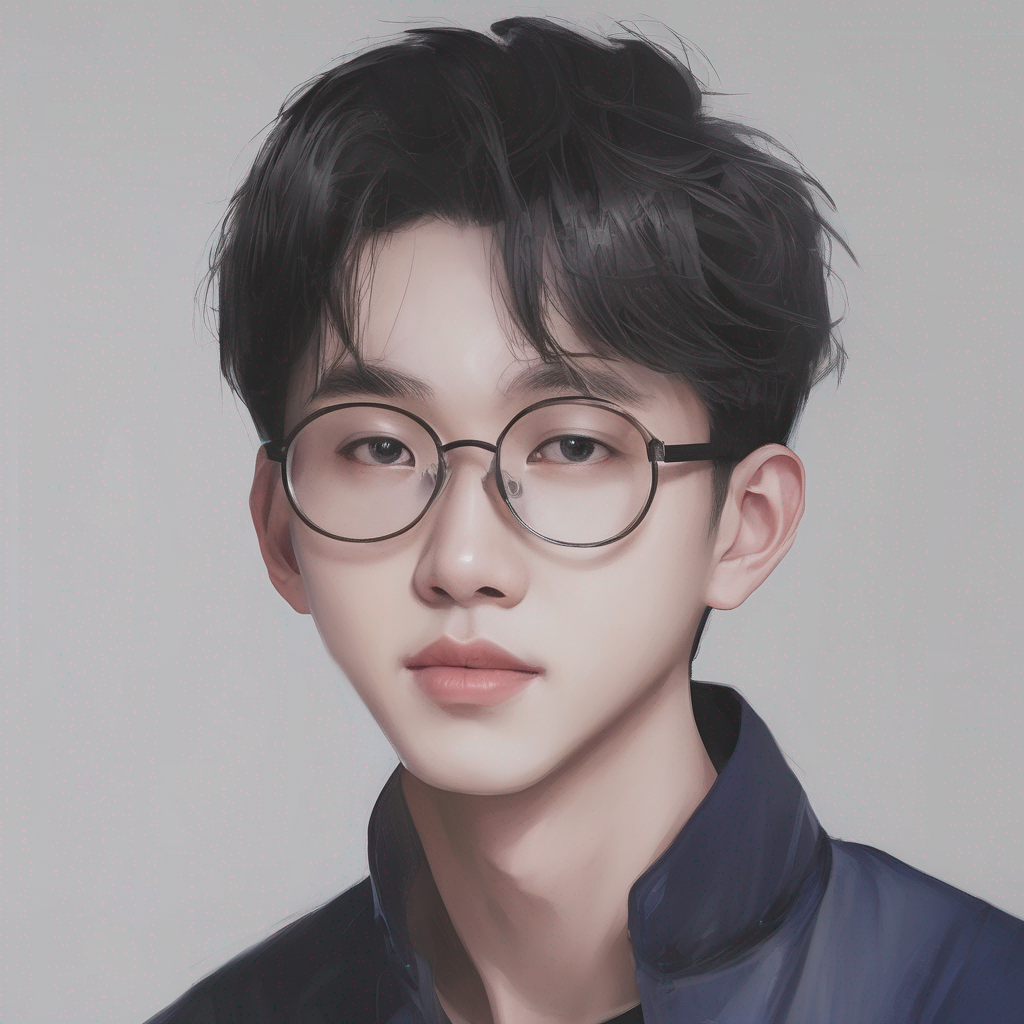

In [50]:
image

In [52]:
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0", 
                                                        torch_dtype=torch.float16, 
                                                        variant="fp16",
                                                        use_safetensors=True,
                                                        #local_files_only=True
)
pipe = pipe.to("cuda")

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

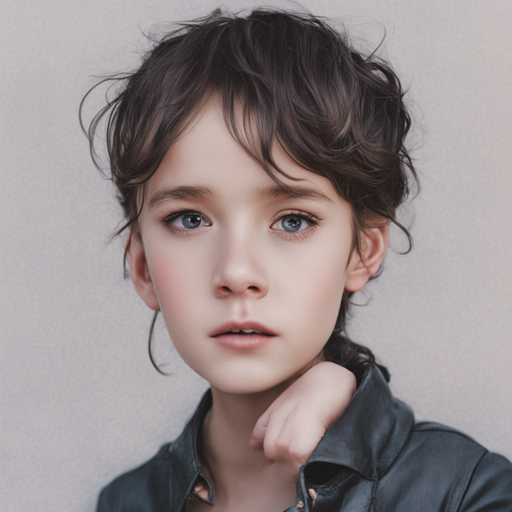

In [54]:
pipe("1 girl walking on the street", image=image, strength=0.7).images[0].resize([512,512])